## Wearable Tech: Week 1 Assignment

## Step 1

In [16]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates
import datetime

# Read in the dataset

df = pd.read_csv("../Data/TexasTechVBall.csv")
df.head()

,EVENT NAME,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,MAX ENERGY,SETS BY ENERGY,POWER,INTENSITY,...,JUMPS,JUMPS 15+,JUMPS 20+,HIGHEST JUMP (in),AVG HI JUMP (in),% MAX JUMP,MAX JUMP (in),HIGH LANDING %,ALERT LANDING %,ELEVATED LANDING %
0,8/19/19,PRAC,8/19/19,Erika,S,1595,2750,2.9,9.6,15.6,...,116,8,0,17.7,14.0,62,22.5,0,0,0
1,8-19-19#2,PRAC,8/19/19,Erika,S,1020,2750,1.9,8.4,14.6,...,62,2,1,21.7,13.4,60,22.5,0,0,0
2,8/19/19,PRAC,8/19/19,Adelaide,MB,1869,2500,4.7,9.4,16.8,...,194,126,8,22.2,18.8,75,25.0,3,2,5
3,8-19-19#2,PRAC,8/19/19,Adelaide,MB,451,2500,1.1,8.4,10.0,...,53,41,2,20.4,17.9,72,25.0,4,0,4
4,8/19/19,PRAC,8/19/19,Ingrid,OH,2747,3720,3.7,10.3,19.9,...,121,113,91,28.9,26.5,88,30.0,7,2,9


In [17]:
df.columns

Index(['EVENT NAME', 'EVENT TYPE', 'DATE', 'PLAYER NAME', 'POSITION', 'ENERGY',
       'MAX ENERGY', 'SETS BY ENERGY', 'POWER', 'INTENSITY', 'STRESS',
       'ACTIVE MINS', 'JUMPS', 'JUMPS 15+', 'JUMPS 20+', 'HIGHEST JUMP (in)',
       'AVG HI JUMP (in)', '% MAX JUMP', 'MAX JUMP (in)', 'HIGH LANDING %',
       'ALERT LANDING %', 'ELEVATED LANDING %'],
      dtype='object')

## Step 2

In [18]:
df['DATE']= pd.to_datetime(df.DATE)
df.loc[:,'WEEK'] = (df['DATE'].dt.week) - 33
df['WEEK'] = df['WEEK'].astype('object')
df.head()


,EVENT NAME,EVENT TYPE,DATE,PLAYER NAME,POSITION,ENERGY,MAX ENERGY,SETS BY ENERGY,POWER,INTENSITY,...,JUMPS 15+,JUMPS 20+,HIGHEST JUMP (in),AVG HI JUMP (in),% MAX JUMP,MAX JUMP (in),HIGH LANDING %,ALERT LANDING %,ELEVATED LANDING %,WEEK
0,8/19/19,PRAC,2019-08-19,Erika,S,1595,2750,2.9,9.6,15.6,...,8,0,17.7,14.0,62,22.5,0,0,0,1
1,8-19-19#2,PRAC,2019-08-19,Erika,S,1020,2750,1.9,8.4,14.6,...,2,1,21.7,13.4,60,22.5,0,0,0,1
2,8/19/19,PRAC,2019-08-19,Adelaide,MB,1869,2500,4.7,9.4,16.8,...,126,8,22.2,18.8,75,25.0,3,2,5,1
3,8-19-19#2,PRAC,2019-08-19,Adelaide,MB,451,2500,1.1,8.4,10.0,...,41,2,20.4,17.9,72,25.0,4,0,4,1
4,8/19/19,PRAC,2019-08-19,Ingrid,OH,2747,3720,3.7,10.3,19.9,...,113,91,28.9,26.5,88,30.0,7,2,9,1


## Step 3

In [19]:
# calucate the mean value for total jumps, jumpos over 15, over 20, hihgest jumps for practice, scrimmage, game
df.groupby(['EVENT TYPE', 'POSITION'])['JUMPS', 'JUMPS 15+', 'JUMPS 20+'].mean()

JUMPS   JUMPS 15+  JUMPS 20+
EVENT TYPE POSITION                                   
GAME       MB         77.652174   64.391304  24.434783
           OH         48.905660   39.981132  23.962264
           S          96.583333   23.458333   0.791667
PRAC       MB        132.010000   97.520000  22.450000
           OH         81.157407   66.995370  32.972222
           S         106.728814   23.991525   0.813559
SCRIMMAGE  MB        159.333333  132.000000  35.666667
           OH         90.000000   80.428571  53.142857
           S         138.750000   37.250000   3.000000

## Step 4

In [20]:
# calculate the means of deceleartion landing measures for player
df.groupby(['EVENT TYPE', 'POSITION'])['HIGH LANDING %','ALERT LANDING %', 'ELEVATED LANDING %'].mean()

HIGH LANDING %  ALERT LANDING %  ELEVATED LANDING %
EVENT TYPE POSITION                                                     
GAME       MB              5.608696         2.304348            7.739130
           OH             10.226415         2.622642           12.867925
           S               2.833333         1.791667            4.541667
PRAC       MB              3.420000         0.860000            4.330000
           OH              5.361111         1.504630            6.870370
           S               0.991525         0.271186            1.245763
SCRIMMAGE  MB              2.666667         0.333333            3.000000
           OH              6.285714         4.000000           10.428571
           S               3.500000         0.250000            3.750000

## Step 5

Text(0, 0.5, 'ALERT LANDING %')

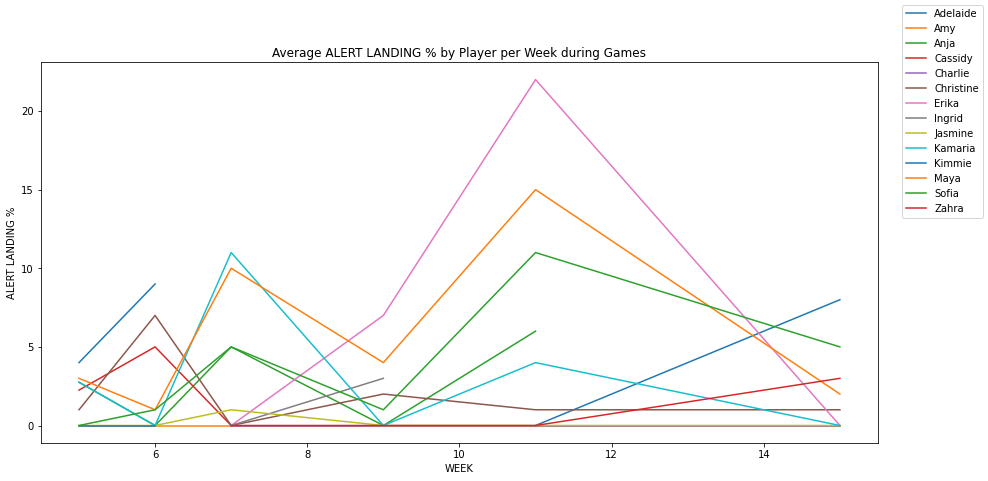

In [24]:
# make it games only
df_game = df.loc[df['EVENT TYPE'] == 'GAME']

# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_game.groupby(['WEEK', 'PLAYER NAME']).mean()['ALERT LANDING %'].unstack().plot(ax=ax, legend=False)

fig.legend(loc="upper right")
plt.title("Average ALERT LANDING % by Player per Week during Games")
plt.ylabel("ALERT LANDING %")

## Step 6

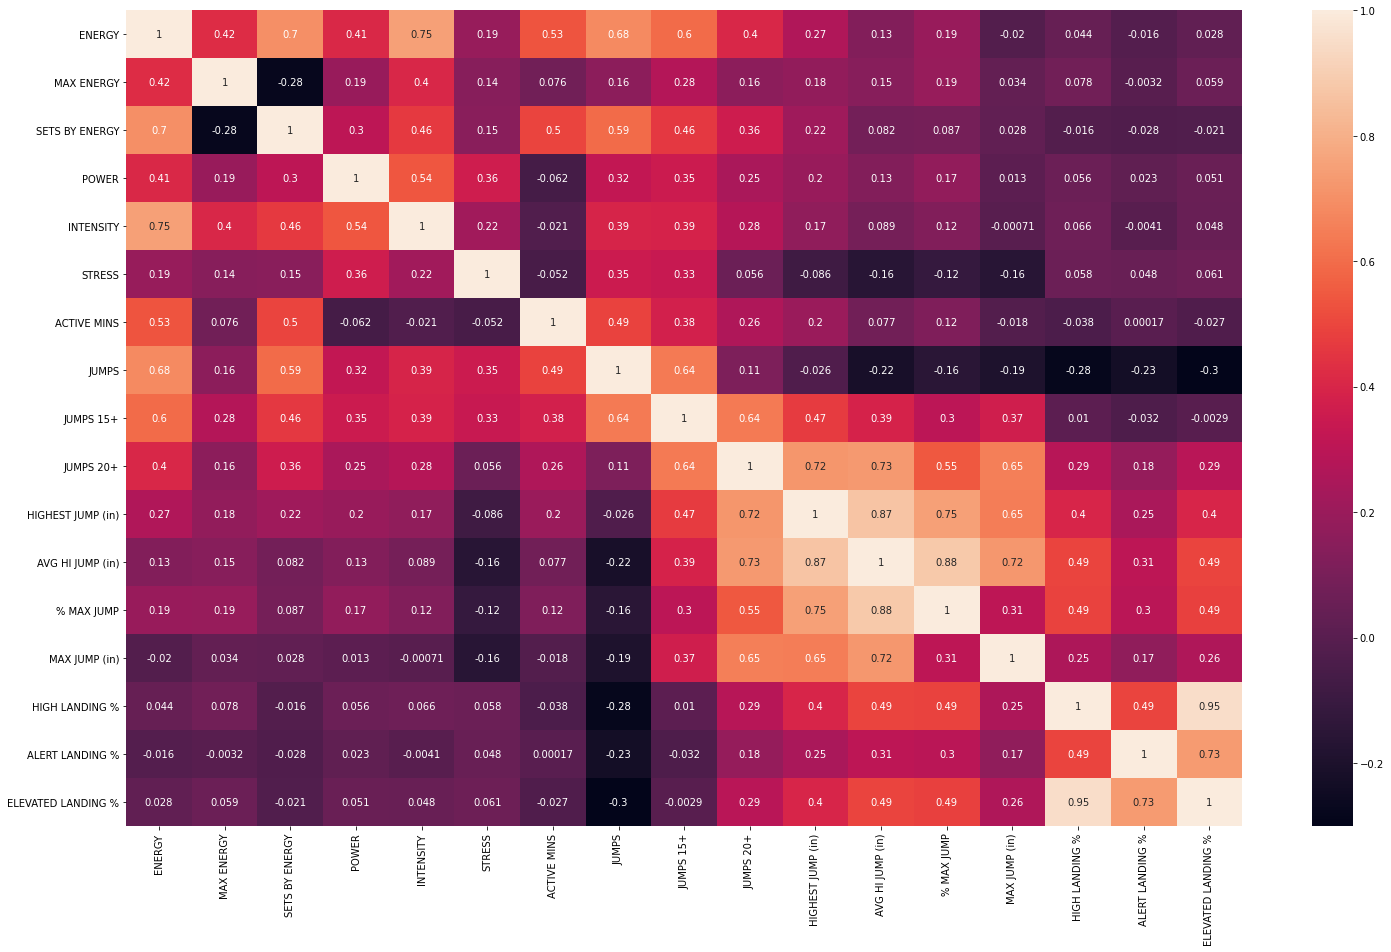

In [33]:
#Evaluate correlations (e.g. a correlation matrix) of the different vert measures to determine what factor(s) seem most 
# highly correlated with the “elevated landing” measure (which is a combination of the “alert landing” and 
# “high landing” measures).  Determine which other measures (outside of the deceleration measures) are most highly 
# correlated with the “elevated landing” measure.  In addition to the correlation matrix, you could plot the measures
# that have the highest correlation with “elevated landing %”.  
# Use all sessions for your analyses (i.e. games, practices, and scrimmages). 

a= df.corr()
sn.heatmap(a, annot=True)
plt.rcParams["figure.figsize"]= (25,15)
plt.show()

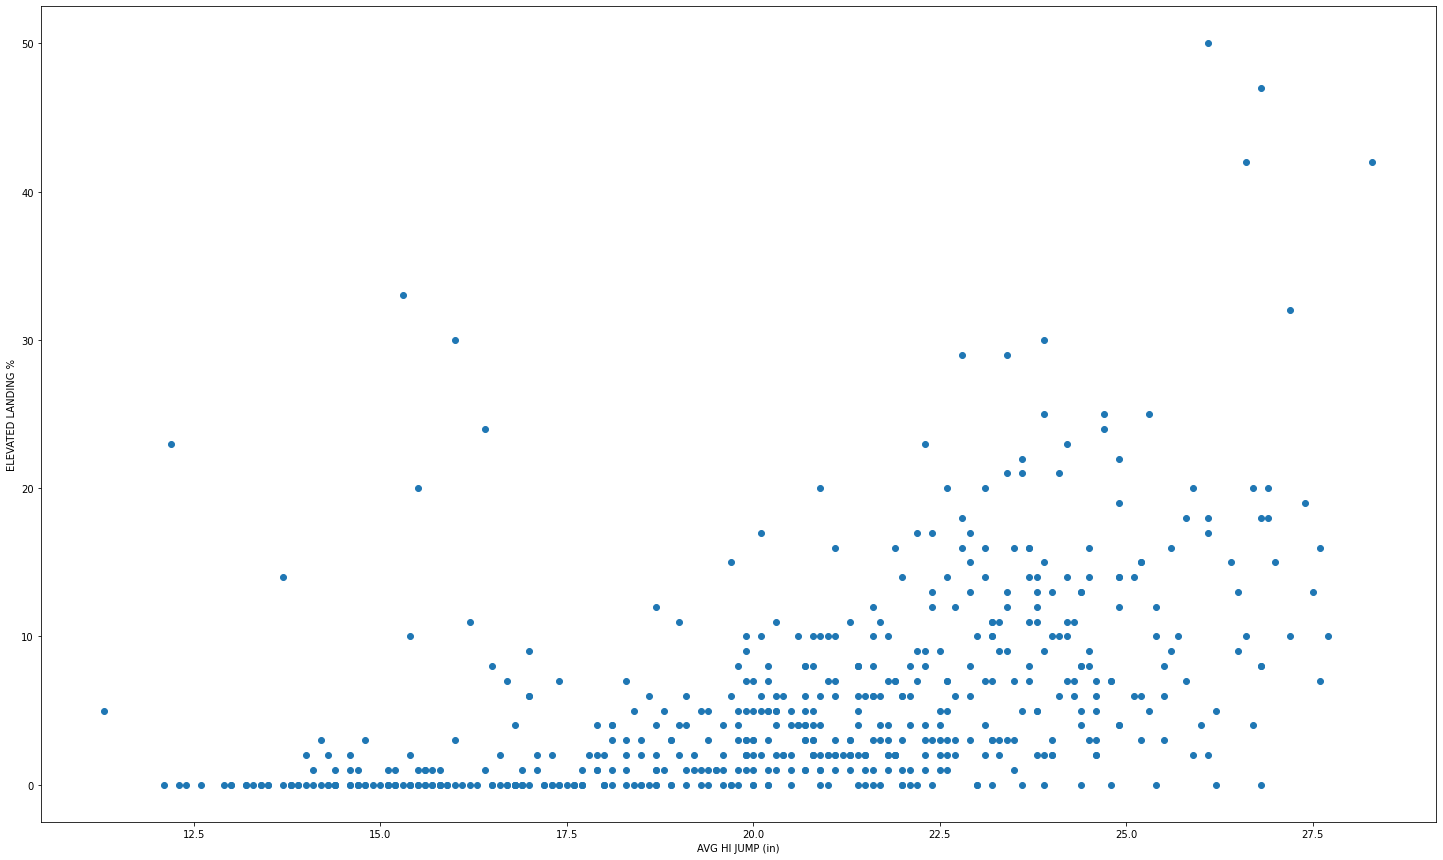

In [35]:
plt.scatter(df['AVG HI JUMP (in)'], df['ELEVATED LANDING %'])
plt.xlabel('AVG HI JUMP (in)')
plt.ylabel('ELEVATED LANDING %')
plt.show()

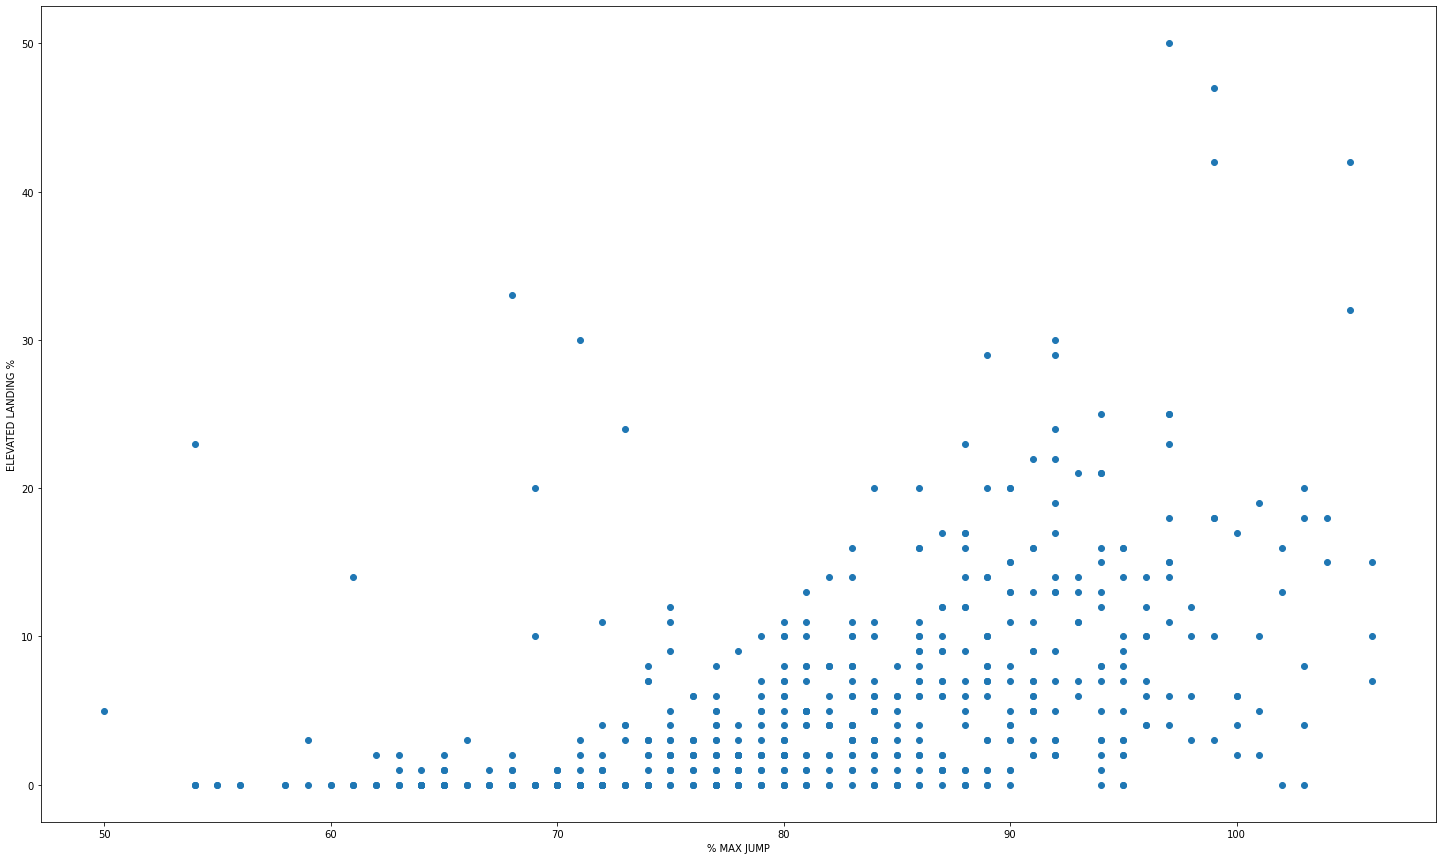

In [36]:
plt.scatter(df['% MAX JUMP'], df['ELEVATED LANDING %'])
plt.xlabel('% MAX JUMP')
plt.ylabel('ELEVATED LANDING %')
plt.show()